# Final data pre-processing:

So far have intend to use the original kaggele data - but for better model training merged the freshly scrapped data, with new additional features - ['name', 'photo', 'pledged', 'state', 'staff_pick', 
                             'is_starrable', 'static_usd_rate', 'usd_pledged', 'creator', 
                             'category', 'profile', 'spotlight']
                             
                             
 <b>Now the usable datasets are</b>:
 
 train_new_innerjoin - (83096, 25)
 
 train_new_leftjoin - (108800, 25)
                             

In [17]:
from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))


kickstarter_projects.csv
kickstarter_projects_proper.csv
new_dataset.csv
samplesubmission.csv
test.csv
train.csv
train_new.csv
train_new_innerjoin.csv
train_new_leftjoin.csv
train_new_numeric.csv
train_ready.csv



In [20]:
import pandas as pd

train_innerjoin = pd.read_csv('data/train_new_innerjoin.csv')
train_innerjoin.shape

(83096, 31)

In [25]:
train_innerjoin.head(2)

,project_id,name,desc,description_size,goal,keywords,disable_communication,country,currency,deadline,...,staff_pick,is_starrable,static_usd_rate,usd_pledged,creator,category,profile,spotlight,is_backing,is_starred
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,134.0,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,...,True,False,1.0,35.0,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,NaN,NaN
1,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,385.0,30.0,mr-squiggles,False,US,USD,2009-05-22 21:26:00,...,False,False,1.0,0.0,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",False,NaN,NaN


In [6]:
train_innerjoin.describe()

,description_size,goal,backers_count,final_status,std_goal,project_duration,creation_to_launch,pledged,static_usd_rate,usd_pledged,is_backing,is_starred
count,83079.000000,8.309600e+04,83096.000000,83096.000000,83096.000000,83096.000000,83096.000000,8.309600e+04,83096.000000,8.309600e+04,0.0,0.0
mean,128.266806,3.755120e+04,133.522275,0.351702,0.000376,33.889176,35.733441,1.046335e+04,1.037177,1.058518e+04,NaN,NaN
std,68.730961,1.032037e+06,1049.540416,0.477504,0.010320,13.011661,84.305255,9.734290e+04,0.181879,9.791797e+04,NaN,NaN
min,1.000000,1.000000e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.056937,0.000000e+00,NaN,NaN
25%,105.000000,1.600000e+03,2.000000,0.000000,0.000016,30.000000,2.000000,5.000000e+01,1.000000,5.000000e+01,NaN,NaN
50%,126.000000,5.000000e+03,19.000000,0.000000,0.000050,30.000000,9.000000,1.030000e+03,1.000000,1.050000e+03,NaN,NaN
75%,133.000000,1.250000e+04,70.000000,1.000000,0.000125,37.000000,31.000000,5.135000e+03,1.000000,5.180000e+03,NaN,NaN
max,1151.000000,1.000000e+08,105857.000000,1.000000,1.000000,91.000000,1903.000000,1.328523e+07,1.716408,1.328523e+07,NaN,NaN


# Class - final_status

In [7]:
print(train_innerjoin['final_status'].value_counts())


0    53871
1    29225
Name: final_status, dtype: int64


In [8]:
100 * train_innerjoin.final_status.value_counts()/len(train_innerjoin.final_status)

0    64.829835
1    35.170165
Name: final_status, dtype: float64

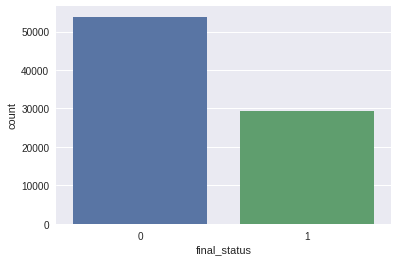

In [4]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

sns.countplot(x='final_status',data=train_innerjoin)

# backers_count

In [10]:
print(train_innerjoin.backers_count.max())
print(train_innerjoin.backers_count.min())
print(train_innerjoin.backers_count.mean())
# average backers for successful projects
print(train_innerjoin.backers_count[train_innerjoin.final_status == 1].mean())
print(train_innerjoin.backers_count.std())  # standard deviation 

105857
0
133.52227544
328.186005133
1049.54041605


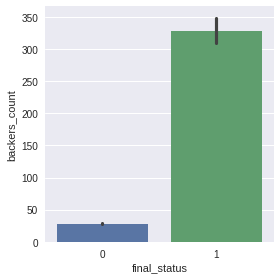

In [11]:
sns.factorplot(x='final_status', y='backers_count', data=train_innerjoin, kind='bar')

# goal

In [12]:
# print(train_data['goal'].idxmax())  # index of max
print(train_innerjoin['goal'].max()) # max value for the column
print(train_innerjoin['goal'].min())
print(train_innerjoin['goal'].mean())  # average/mean of the column
print(train_innerjoin.goal.std())  # standard deviation 

100000000.0
0.01
37551.2006873
1032037.02839


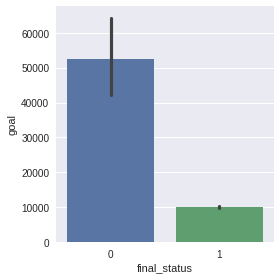

In [13]:
sns.factorplot(x='final_status', y='goal', data=train_innerjoin, kind='bar')

# Country

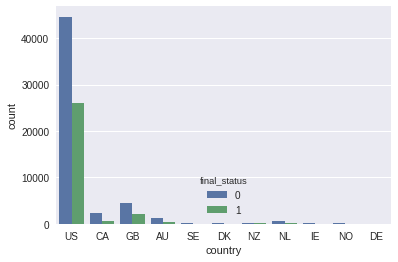

In [14]:
sns.countplot(x='country',data=train_innerjoin, hue='final_status')

# Preprocessing Plan:

<b>Extract the project category </b>- have it as a separate attribute.

<b>Calculate project_duration</b> - 

<b>calculate creation_to_launch </b> - 

Categorical to numerical - country, 

# Category extraction 

In [21]:
tmp_df = pd.DataFrame([x for x in train_innerjoin['category']])
print(tmp_df[:2])

                                                   0
0  {"urls":{"web":{"discover":"http://www.kicksta...
1  {"urls":{"web":{"discover":"http://www.kicksta...


In [45]:
cat = {"urls":
           {"web": {"discover":"http://www.kickstarter.com/discover/categories/art/mixed%20media"}},
            "color":16760235,
           "parent_id":1,
       "name":"Mixed Media",
       "id":54,
       "position":6,
       "slug":"art/mixed media"}

In [52]:
print(type(cat))
print(cat['name'])  # sub_category
print(cat['slug'].split('/')[0])  # main_category

<type 'dict'>
Mixed Media
art


In [17]:
# sub_category = [d.get('name') for d in train_innerjoin.category]


In [22]:
categories = [eval(d) for d in train_innerjoin.category]
print(categories[:2])

[{'name': 'Illustration', 'color': 16760235, 'slug': 'art/illustration', 'parent_id': 1, 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/art/illustration'}}, 'position': 4, 'id': 22}, {'name': 'Illustration', 'color': 16760235, 'slug': 'art/illustration', 'parent_id': 1, 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/art/illustration'}}, 'position': 4, 'id': 22}]


In [24]:
sub_category = [c['name'] for c in categories]
print(sub_category[:3])
print(len(sub_category))

['Illustration', 'Illustration', 'Fiction']
83096


In [25]:
main_category = [c['slug'].split('/')[0] for c in categories]
print(main_category[:3])
print(len(main_category))

['art', 'art', 'publishing']
83096


In [26]:
# train_innerjoin['sub_category'] = sub_category
train_innerjoin.insert(27, 'sub_category', sub_category)

In [28]:
train_innerjoin.head(2)

,project_id,name,desc,description_size,goal,keywords,disable_communication,country,currency,deadline,...,is_starrable,static_usd_rate,usd_pledged,creator,category,sub_category,profile,spotlight,is_backing,is_starred
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,134.0,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,...,False,1.0,35.0,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",Illustration,"{""background_image_opacity"":0.8,""should_show_f...",True,NaN,NaN
1,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,385.0,30.0,mr-squiggles,False,US,USD,2009-05-22 21:26:00,...,False,1.0,0.0,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",Illustration,"{""background_image_opacity"":0.8,""should_show_f...",False,NaN,NaN


In [27]:
len(train_innerjoin.sub_category.unique())

143

In [28]:
# train_innerjoin['main_category_tmp'] = main_category
train_innerjoin.insert(27, 'main_category', main_category)

In [29]:
len(train_innerjoin.main_category.unique())

15

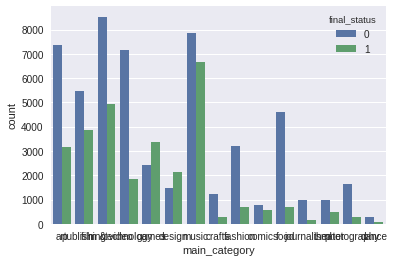

In [37]:
sns.countplot(x='main_category',data=train_innerjoin, hue='final_status')

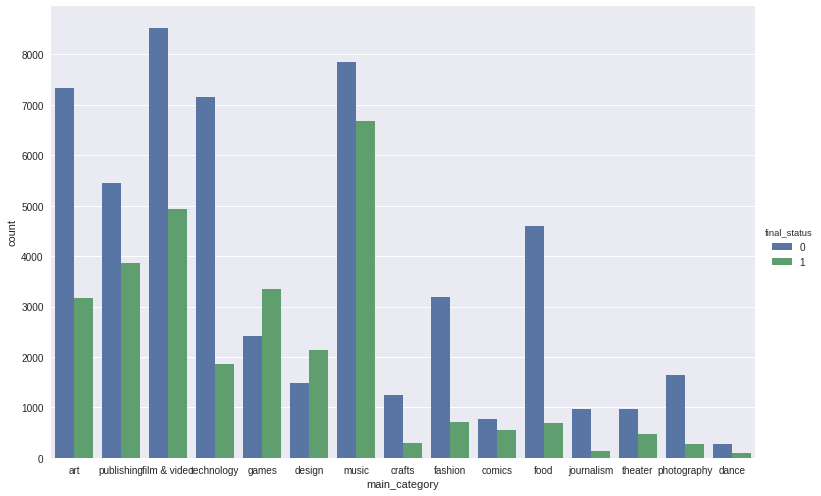

In [53]:
# Size will change the height, while maintaining the aspect ratio (so it will also also get wider if only size is changed.)
# Aspect will change the width while keeping the height constant.
# sns.countplot(x='main_category',data=train_innerjoin, hue='final_status', size=1, aspect=1)

sns.factorplot(x="main_category", hue="final_status",
                  data=train_innerjoin, kind="count",
                   size=7, aspect=1.5);

# Spotlight

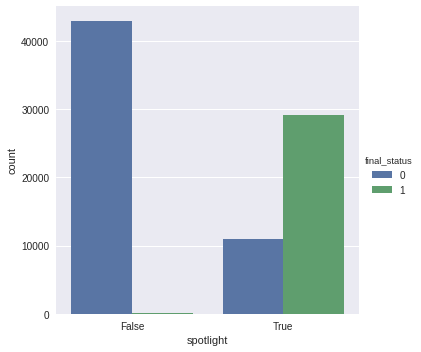

In [47]:
# sns.countplot(x='spotlight',data=train_innerjoin, hue='final_status')

sns.factorplot(x="spotlight", hue="final_status",
                  data=train_innerjoin, kind="count",
                   size=5, aspect=1);

# pledged amount

In [61]:
print(train_innerjoin.pledged.max())
print(train_innerjoin.pledged.min())
print(train_innerjoin.pledged.mean())
print(train_innerjoin.pledged[train_innerjoin.final_status == 1].mean())  # average backers for successful projects
print(train_innerjoin.pledged[train_innerjoin.final_status == 0].mean())  # average backers for failed projects


13285226.36
0.0
10463.3548172
24793.583806
2689.21024596


In [ ]:
sns.countplot(x='pledged',data=train_innerjoin, hue='final_status')

# Staff pick

In [50]:
# print(train_innerjoin.staff_pick.max())
# print(train_innerjoin.staff_pick.min())
# print(train_innerjoin.staff_pick.mean())
print(train_innerjoin.staff_pick[train_innerjoin.final_status == 1].mean())  # average backers for successful projects
print(train_innerjoin.staff_pick[train_innerjoin.final_status == 0].mean())  # average backers for failed projects


True
False
0.122340425532
0.230487596236
0.0636706205565


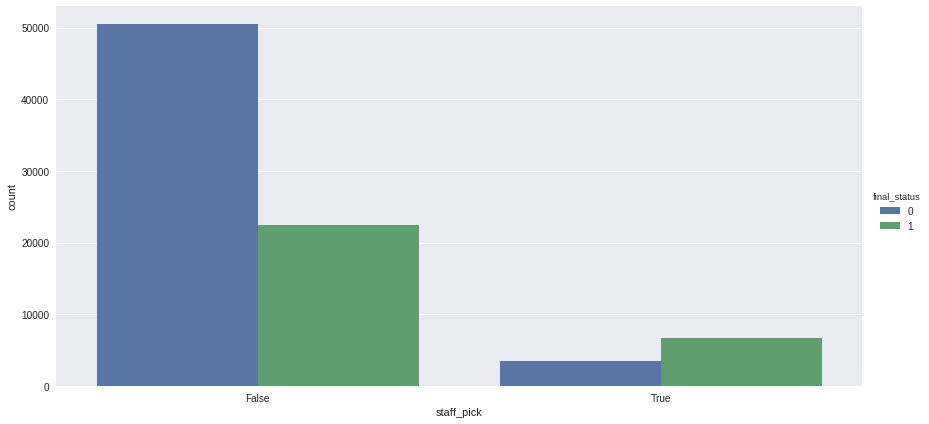

In [49]:

sns.factorplot(x="staff_pick", hue="final_status",
                  data=train_innerjoin, kind="count",
                   size=6, aspect=2);

# Categorical to Numerical:

country, main_category, sub_category, spotlight, staff_pick, 

In [4]:
# cat_columns = train_innerjoin.select_dtypes(['category']).columns
# print(cat_columns)

Index([], dtype='object')


In [36]:
# print(train_innerjoin.dtypes)


# Boolean to Numerical:

spotlight, staff_pick, is_starrable, disable_communication

In [30]:
bool_columns = train_innerjoin.select_dtypes(['bool']).columns
# int_columns = train_innerjoin.select_dtypes(['int']).columns

print(bool_columns)
# traintrain_innerjoin.spotlight.astype(int)

Index([u'disable_communication', u'staff_pick', u'is_starrable', u'spotlight'], dtype='object')


In [32]:
train_innerjoin[bool_columns] = train_innerjoin[bool_columns].apply(lambda x: x.astype(float))

In [47]:
print(train_innerjoin.dtypes)


project_id                object
name                      object
desc                      object
description_size         float64
goal                     float64
keywords                  object
disable_communication    float64
country                     int8
currency                  object
deadline                  object
state_changed_at          object
created_at                object
launched_at               object
backers_count              int64
final_status               int64
std_goal                 float64
project_duration           int64
creation_to_launch         int64
photo                     object
pledged                  float64
state                     object
staff_pick               float64
is_starrable             float64
static_usd_rate          float64
usd_pledged              float64
creator                   object
category                  object
main_category               int8
sub_category               int16
profile                   object
spotlight 

# Object to numerical 

In [41]:
# train_innerjoin["cat_tmp"] = train_innerjoin["main_category"].astype('category')
# train_innerjoin.drop('cat_tmp', axis=1, inplace=True)
# print(train_innerjoin.dtypes)
train_innerjoin["main_category"] = train_innerjoin["main_category"].astype('category')
train_innerjoin["sub_category"] = train_innerjoin["sub_category"].astype('category')
train_innerjoin["country"] = train_innerjoin["country"].astype('category')


train_innerjoin.head(2)

,project_id,name,desc,description_size,goal,keywords,disable_communication,country,currency,deadline,...,static_usd_rate,usd_pledged,creator,category,main_category,sub_category,profile,spotlight,is_backing,is_starred
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,134.0,20.0,drawing-for-dollars,0.0,US,USD,2009-05-03 06:59:59,...,1.0,35.0,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",art,Illustration,"{""background_image_opacity"":0.8,""should_show_f...",1.0,NaN,NaN
1,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,385.0,30.0,mr-squiggles,0.0,US,USD,2009-05-22 21:26:00,...,1.0,0.0,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",art,Illustration,"{""background_image_opacity"":0.8,""should_show_f...",0.0,NaN,NaN


In [42]:
# extract the categorical attributes
cat_columns = train_innerjoin.select_dtypes(['category']).columns
print(cat_columns)

Index([u'country', u'main_category', u'sub_category'], dtype='object')


In [43]:
# the conversion 
train_innerjoin[cat_columns] = train_innerjoin[cat_columns].apply(lambda x: x.cat.codes)

In [73]:
train_innerjoin.head(2)

,project_id,name,desc,description_size,goal_norm,goal,keywords,disable_communication,country,currency,...,usd_pledged,creator,category,main_category,sub_category,profile,spotlight,is_backing,is_starred,backers_count_norm
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,134.0,1.999000e-07,20.0,drawing-for-dollars,0.0,10,USD,...,35.0,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",0,61,"{""background_image_opacity"":0.8,""should_show_f...",1.0,NaN,NaN,0.000028
1,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,385.0,2.999000e-07,30.0,mr-squiggles,0.0,10,USD,...,0.0,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",0,61,"{""background_image_opacity"":0.8,""should_show_f...",0.0,NaN,NaN,0.000000


In [45]:
len(train_innerjoin.main_category.value_counts())

15

# Saving new numeric data

In [76]:
train_innerjoin.to_csv('data/train_new_numeric.csv', index=False)  # index=False otherwise adds 'Unnamed' index

# Normalizing 'goal'


For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is important to get good prediction.


using z-score - as the min and max are way too apart - makes mean 0 and standard deviation 1.

In [48]:
train_innerjoin['goal_norm'] = train_innerjoin.std_goal

In [54]:
from sklearn import preprocessing

# x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
# goal_scaled = min_max_scaler.fit_transform(train_data.goal)
# train_data['std_goal'] = goal_scaled

In [52]:
# train_innerjoin.drop('goal_norm', axis=1, inplace=True)
train_innerjoin.insert(4, 'goal_norm', train_innerjoin.std_goal)

In [61]:
backers_count_scaled = min_max_scaler.fit_transform(train_innerjoin.backers_count)
# train_innerjoin.insert(4, 'backers_count_norm', backers_count_scaled)
train_innerjoin['backers_count_norm'] = backers_count_scaled

/home/nahmed/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/nahmed/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


# Fill empty cells - NaN


In [64]:
train_innerjoin.spotlight = train_innerjoin.spotlight.fillna(0)

In [66]:
train_innerjoin.spotlight = train_innerjoin.staff_pick.fillna(0)

In [68]:
train_innerjoin.description_size = train_innerjoin.description_size.fillna(0)

In [74]:
train_innerjoin.is_starred= train_innerjoin.is_starred.fillna(0)

In [75]:
train_innerjoin.is_backing= train_innerjoin.is_backing.fillna(0)

# Data split